In [1]:
import dask.array as da

In [2]:
arr1 = da.ones(15,chunks=3)
arr2 = da.ones(15,chunks=3)

In [18]:
def do_something_1(x,y):
    return x + y + 2*x*y
def do_something_2(a,b):
    return a**3 - b**2 
def do_something_3(p,q):
    return p*p + q*q 
def do_something_4(x):
    return x*3

In [19]:
dsk = {
    'thrice_1':(do_something_4,10),
    'thrice_2':(do_something_4,20),
    'thrice_3':(do_something_4,30),
    'thrice_4':(do_something_4,40),
    'square_sum':(do_something_3,'thrice_1','thrice_2'),
    'a_plub_b_wholeSquare':(do_something_1,'square_sum','thrice_3'),
    'some_complex_stuff':(do_something_2,'thrice_4','a_plub_b_wholeSquare')}

In [20]:
from dask.multiprocessing import get

In [21]:
my_task = get(dsk,'some_complex_stuff')

In [22]:
my_task

-663555140100

In [23]:
import dask

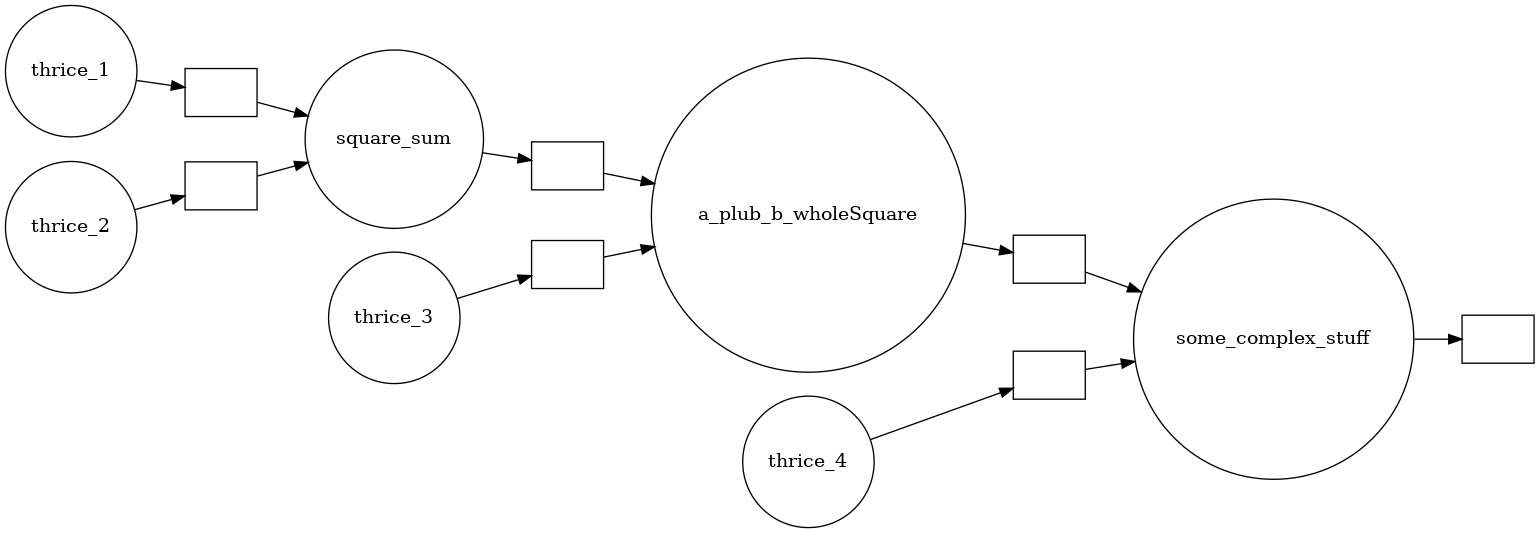

In [24]:
dask.visualize(dsk,rankdir="LR")